# Iris Species

Classify iris plants into three species in this classic dataset

In [16]:
# 1. Prepare Problem
# a) Load libraries
from pandas import read_csv
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [9]:
# b) Load dataset

filename = 'datasets/Iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names, skiprows=1)
dataset.head(20)


,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
## 2. Summarize Data
# a) Descriptive statistics

description = dataset.describe()
print(description)

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [11]:
outcome = dataset.groupby('class').size()
print(outcome)

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [17]:
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
correlations = dataset[numeric_columns].corr()
print(correlations)


              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000


sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
dtype: float64


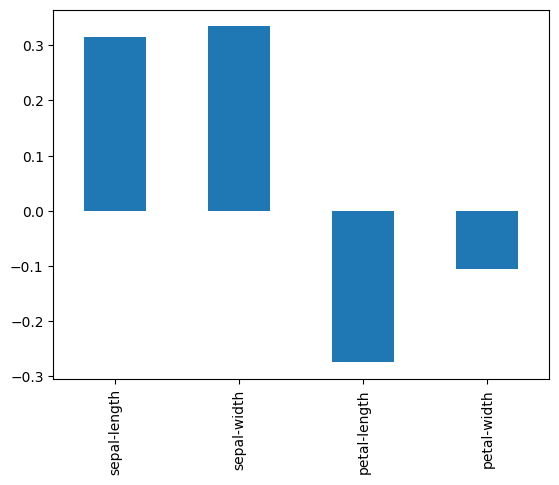

In [20]:
skew = dataset[numeric_columns].skew()
print(skew)
skew.plot(kind='bar')
pyplot.show()

<Figure size 1000x1000 with 0 Axes>

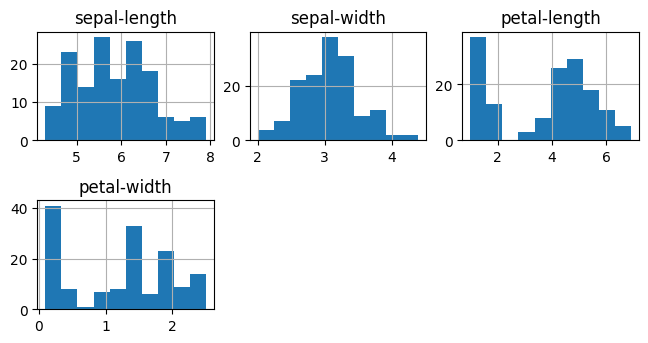

In [22]:
# b) Data visualizations

fig = pyplot.figure(figsize=(10, 10))
dataset.hist(layout=(3, 3))
pyplot.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
pyplot.show()


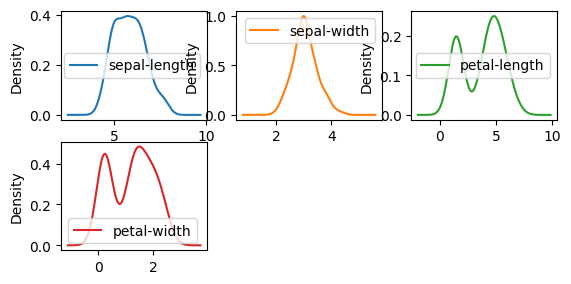

In [23]:
dataset.plot(kind="density", subplots=True, layout=(3, 3), sharex=False)
pyplot.show()

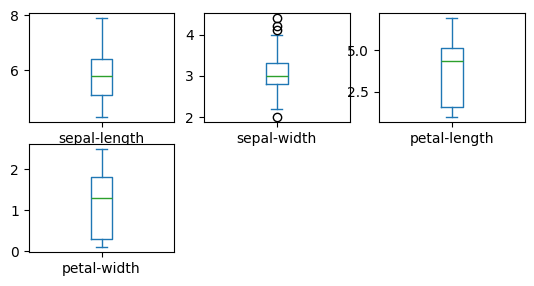

In [24]:
dataset.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False)
pyplot.show()

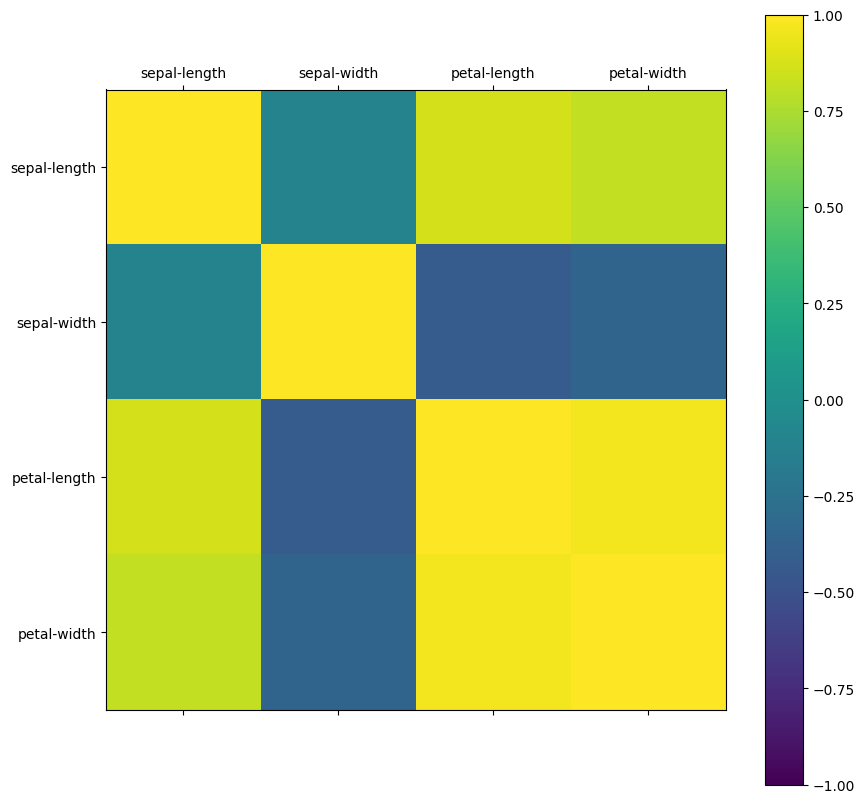

In [28]:
correlation_matrix = dataset[numeric_columns].corr()
names = dataset.columns[0:4]
fig = pyplot.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

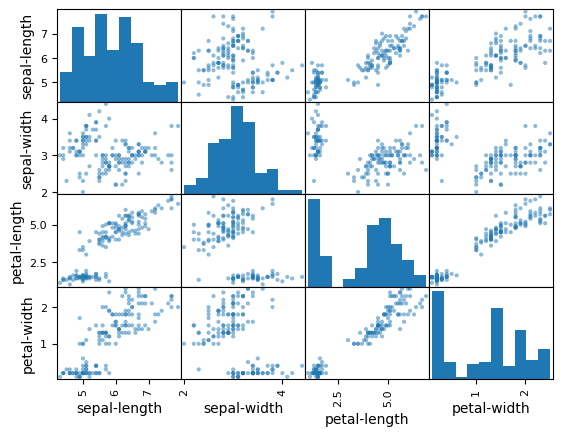

In [29]:
scatter_matrix(dataset)
pyplot.show()

In [34]:
# 3. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: 0.958333 (0.055902)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.991667 (0.025000)


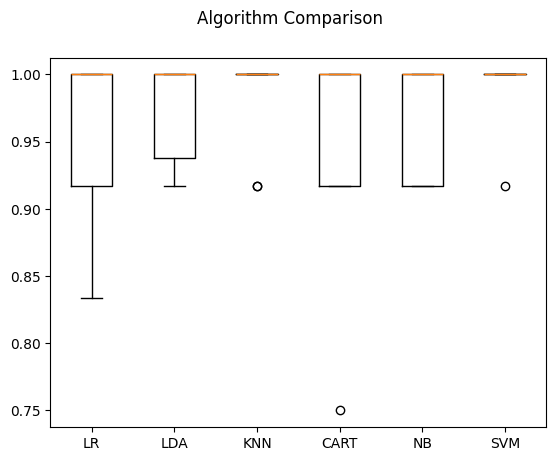

In [35]:
# d) Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [36]:
# 4. Finalize Model
# a) Predictions on validation dataset

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

